In [10]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

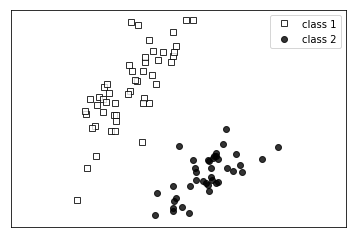

In [7]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
np.random.seed(22)

means = [[0, 5], [5, 0]]
cov0 = [[4, 3], [3, 4]]
cov1 = [[3, 1], [1, 1]]
N0 = 50
N1 = 40
N = N0 + N1
X0 = np.random.multivariate_normal(means[0], cov0, N0) # each row is a data point 
X1 = np.random.multivariate_normal(means[1], cov1, N1)

# display
with PdfPages('data.pdf') as pdf:
    plt.plot(X0[:, 0], X0[:, 1], color='white',  marker = 's', mec = 'black', alpha=.8, 
                label='class 1')
    plt.scatter(X1[:, 0], X1[:, 1], color='black', marker = 'o', alpha=.8, 
                label='class 2')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    
    # hide ticks
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    plt.xlim([0, 1])
    plt.ylim([-10, 10])
    plt.axis('equal')

    pdf.savefig()

    plt.show()

In [9]:
# Build S_B
m0 = np.mean(X0.T, axis = 1, keepdims = True)
m1 = np.mean(X1.T, axis = 1, keepdims = True)

a = (m0 - m1)
S_B = a.dot(a.T)

# Build S_W
A = X0.T - np.tile(m0, (1, N0))
B = X1.T - np.tile(m1, (1, N1))

S_W = A.dot(A.T) + B.dot(B.T)

In [10]:
_, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
w = W[:,0]

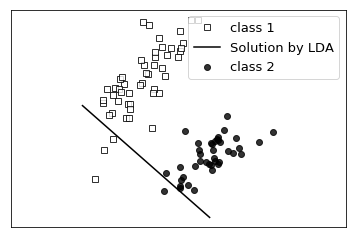

In [13]:
with PdfPages('res.pdf') as pdf:
    plt.plot(X0[:, 0], X0[:, 1], color='white',  marker = 's', mec = 'black', alpha=.8, 
                label='class 1')
    plt.scatter(X1[:, 0], X1[:, 1], color='black', marker = 'o', alpha=.8, 
                label='class 2')
    
#      plt.legend(loc = "best", fontsize = 17)

    
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    plt.xlim([0, 1])
    plt.ylim([-10, 10])
    plt.axis('equal')
#     plt.arrow(5*w[0],5*w[1],-10*w[0],-10*w[1], shape='full', lw=1, length_includes_head=True, head_width=.31)
    plt.plot([-5*w[0], 6*w[0]], [-5*w[1], 6*w[1]], 'k', label = 'Solution by LDA')
    
    plt.legend(loc='best', shadow=False, scatterpoints=1, fontsize = 13)
    pdf.savefig()
    plt.show()

In [7]:
print(w)

[ 0.75091074 -0.66040371]


# Iris

In [135]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=100)

# dimensionality reduction by LDA 
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# print('Acc = %f/%f' %())

from sklearn.metrics import accuracy_score
print("LDA classifier %.2f" %(100*accuracy_score(y_test, y_pred)))

# Train a kernel SVM on projected data by LDA
X_train_new = clf.transform(X_train)
X_test_new = clf.transform(X_test)

from sklearn import svm
svm1 = svm.SVC(kernel='linear', gamma=1)
svm1.fit(X_train_new, y_train)

y_pred1= svm1.predict(X_test_new)



print("LDA + SVM accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred1)))

# Train a kernel SVM on projected data by PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # K = 100
pca.fit(X_train)

X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

svm1 = svm.SVC(kernel='linear', gamma=1)
svm1.fit(X_train_new, y_train)

y_pred2 = svm1.predict(X_test_new)

print("PCA + SVM accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred2)))

LDA classifier 97.00
LDA + SVM accuracy: 95.00 %
PCA + SVM accuracy: 97.00 %


# MNIST

In [1]:
import numpy as np
from sklearn import neighbors, datasets
from mnist import MNIST # require `pip install python-mnist`

from sklearn.model_selection import train_test_split
# https://pypi.python.org/pypi/python-mnist/

# you need to download the MNIST dataset first
# at: http://yann.lecun.com/exdb/mnist/
mndata = MNIST('../MNIST/') # path to your MNIST folder 
mndata.load_testing()
mndata.load_training()
X = mndata.test_images
# X_train = mndata.train_images
y = np.asarray(mndata.test_labels)
# y_train = np.asarray(mndata.train_labels)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=1000)

In [10]:
y_pic = y[y < 4]
X_pic = X[, :]

TypeError: list indices must be integers, not tuple

In [6]:
print(y)

[7 2 1 ..., 4 5 6]


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# dimensionality reduction by LDA 
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

# LDA classifier
y_pred = clf.predict(X_test)
print("LDA classifier accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

# Train a kernel SVM on projected data by LDA
X_train_new = clf.transform(X_train)
X_test_new = clf.transform(X_test)




/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA classifier accuracy: 82.80 %


In [30]:
from sklearn import svm
svm1 = svm.SVC(kernel = 'linear')
svm1.fit(X_train_new, y_train)

y_pred1= svm1.predict(X_test_new)

print("LDA + SVM accuracy     : %.2f %%" %(100*accuracy_score(y_test, y_pred1)))

# Train a kernel SVM on projected data by PCA

LDA + SVM accuracy     : 85.50 %


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10) # K = 100
pca.fit(X_train)

X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

svm1 = svm.SVC(kernel = 'poly')
svm1.fit(X_train_new, y_train)

y_pred2 = svm1.predict(X_test_new)

print("PCA + SVM accuracy    : %.2f %%" %(100*accuracy_score(y_test, y_pred2)))

Automatically created module for IPython interactive environment
explained variance ratio (first two components): [ 0.92461621  0.05301557]


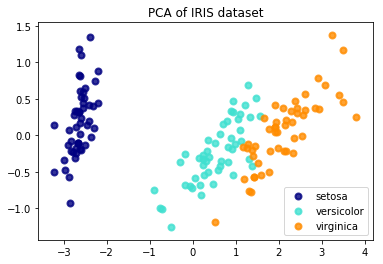

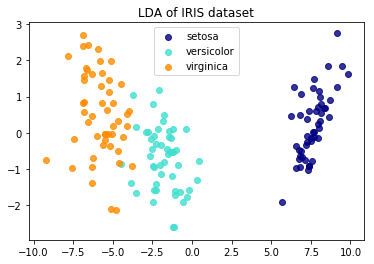

In [1]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

# Fisher faces


In [11]:
import numpy as np
from scipy import misc                     # for loading image
np.random.seed(1)

# filename structure
path = 'unpadded/' # path to the database
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'

# data dimension
h = 116 # hight
w = 98 # width
D = h * w
N = len(states)*15
K = 100

# collect all data
X = np.zeros((D, N))
cnt = 0
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = misc.imread(fn).reshape(D)
        cnt += 1

# Doing PCA, note that each row is a datapoint
# from sklearn.decomposition import PCA
# pca = PCA(n_components=K) # K = 100
# pca.fit(X.T)

# # projection matrix
# U = pca.components_.T

In [12]:
y = np.kron?

In [34]:
y = np.kron(np.arange(15), np.ones((11,), dtype = int))
print y

[ 0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  2  2  2
  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4
  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  9
  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11
 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13
 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14]


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X.T, y)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [36]:
W = clf.coef_ 

In [37]:
W.shape

(15, 11368)

0


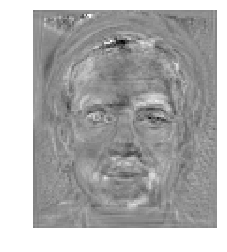

1


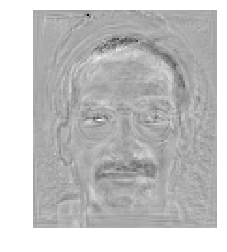

2


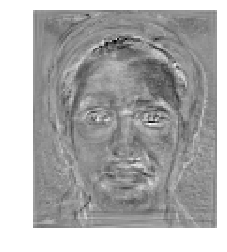

3


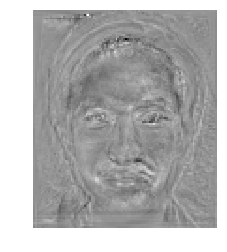

4


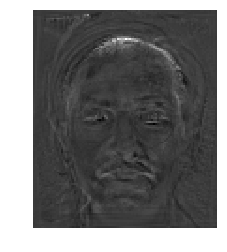

5


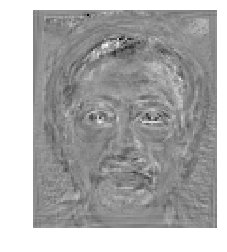

6


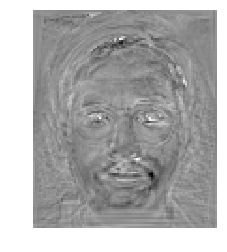

7


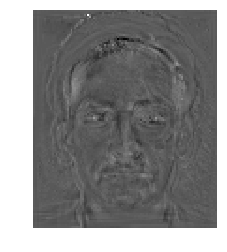

8


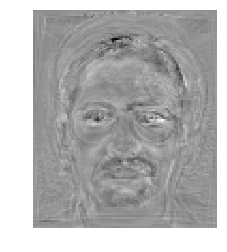

9


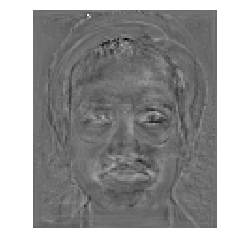

10


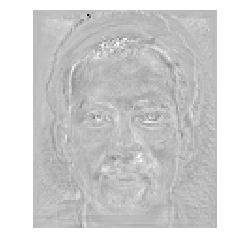

In [40]:
import matplotlib.pyplot as plt
for i in range(11):
    print i
    a = W[i]
    f1 = plt.imshow(a.reshape(h, w), interpolation='nearest')
    plt.axis('off')
    plt.gray()
    plt.show()